In [19]:
import sys
import numpy as np
import scipy.special as sps
from tqdm import tqdm_notebook
import pickle
import pandas as pd
import plotly
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import time
import init_common as x
import helpers as hp
import json

sns.set(rc={'figure.figsize':(11, 4)})
R0_array=[1.58, 1.48]
alpha_array=[1,1]
N = len(alpha_array)
col_array = ['blue','green','orange','red']
data_array = []
symp_share = 0.6
scaling_factor = 1/(x.first_infections_correction_multiplier*symp_share)

def load_data(p):
    with open(p+"/simul_SIR.pickle",'rb') as fid:
        ax = pickle.load(fid)
    fid.close()
    with open(p+"/info.json",'r') as fid:
        bx = json.load(fid)
    return ax,bx

out_filename_dirs = []
out_fig_dirs = []
for i in np.arange(N):
    out_filename_dir,out_fig_dir,out_stat_dir=hp.get_paths(R0_array[i],alpha_array[i])
    out_filename_dirs.append(out_filename_dir)
    out_fig_dirs.append(out_fig_dir)
    data,info_dic = load_data(out_filename_dir)
    data_array.append(data)

In [39]:
# Basic statistics
# 1. Peak of infected, 95% CI
idx=1
data = data_array[idx]
R0 = R0_array[idx]
I_mean = np.array(hp.mean_list(data,'inf',ma=True,w=10))*scaling_factor
I_quant_95 = np.array(hp.quant_list(data,'inf',val=0.95,ma=True,w=10))*scaling_factor
I_quant_05 = np.array(hp.quant_list(data,'inf',val=0.05,ma=True,w=10))*scaling_factor
I_med = np.array(hp.quant_list(data,'inf',val=0.50,ma=True,w=10))*scaling_factor
I_mean_abs = np.round(x.N_popul_size*I_mean)
I_quant_95_abs = np.round(x.N_popul_size*I_quant_95)
I_quant_05_abs = np.round(x.N_popul_size*I_quant_05)
I_med_abs = np.round(x.N_popul_size*I_med)
print("Basic Statistics: number of infected people, R0 = "+ str(np.round(R0,2)))
print('Peak, mean value: ',np.round(I_mean_abs.max()),' day: ',I_mean_abs.argmax())
print('Peak, median value: ',np.round(I_med_abs.max()),' day: ',I_med_abs.argmax())
print('Peak, confidence interval at 95% : ',np.round(I_quant_95_abs.max()),' day: ',I_quant_95_abs.argmax())
print('Peak, confidence interval at 5% : ',np.round(I_quant_05_abs.max()),' day: ',I_quant_05_abs.argmax())    


Basic Statistics: number of infected people, R0 = 1.48
Peak, mean value:  192.0  day:  37
Peak, median value:  127.0  day:  0
Peak, confidence interval at 95% :  639.0  day:  63
Peak, confidence interval at 5% :  116.0  day:  0


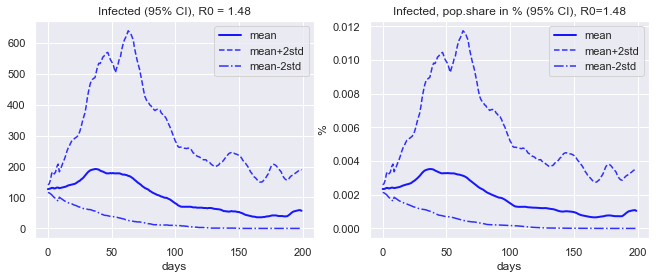

In [40]:
xval=np.arange(0,x.N_per)
plt.subplot(121)
plt.plot(xval,I_mean_abs,color='blue',linewidth=2,alpha=.9)
plt.plot(xval,I_quant_95_abs,color='blue',linestyle='--',alpha=.8)
plt.plot(xval,I_quant_05_abs,color='blue',linestyle='-.',alpha=.8)
#plt.fill_between(xval,I_quant_05_abs,I_quant_95_abs,color=col_array[idx],alpha=0.25)
plt.legend(['mean', 'mean+2std', 'mean-2std'])
plt.xlabel("days")
plt.title("Infected (95% CI), R0 = "+ str(np.round(R0,2)))
plt.subplot(122)
plt.plot(xval,100*I_mean,color='blue',linewidth=2,alpha=.9)
plt.plot(xval,100*I_quant_95,color='blue',linestyle='--',alpha=.8)
plt.plot(xval,100*I_quant_05,color='blue',linestyle='-.',alpha=.8)
plt.legend(['mean', 'mean+2std', 'mean-2std'])
plt.ylabel("%")
plt.xlabel("days")
plt.title("Infected, pop.share in % (95% CI), R0="+ str(np.round(R0,2)))

plt.savefig(out_fig_dirs[idx]+"/peaks.png",dpi=300)
                

In [22]:
# 2. compare growth of infectious persons (absolute numbers, daily basis)
x = np.arange(1,z.simul_len)
plt.rcParams['axes.facecolor']='white'
plot_infect_growth(SIR_high,'red')
plot_infect_growth(SIR_med,'orange')
plot_infect_growth(SIR_low,'green')
plot_infect_growth(SIR_sen,'blue')
plt.title("Denny narast poctu infikovanych")
plt.xlabel("Dni")
plt.ylabel("Pocet novych nakaz")
pls.subplots_adjust(left=.155)
plt.savefig(out_figname+scen_dir+"infect_growth.png".png",dpi=300)
plt.close
            
# 3. compare reported vs. all infected
dat = pd.DataFrame({'Vsetky pripady':np.concatenate([np.array(reported_cases),sumlist(SIR_low)[:,1,:].sum(0)]),
                   'Zachytene pripady':np.concatenate([[0,0,0,0,0],np.array(reported_cases),sumlist(SIR_low)[:,1,:].sum(0)[:-5]])})
x = np.arange(0,109)
plt.plot(x,dat['Zachytene pripady'],c='orange',alpha=1,linewidth=3)
plt.plot(x,dat['Vsetky pripady'],c='red',alpha=1,linewidth=3)
plt.xlim(0,45)
plt.ylim(0,10000)
plt.xlabel('Dni')
plt.ylabel('Pocet')
plt.legend(['Zachytene pripady','Vsetky pripady'])
plt.savefig(out_figname+scen_dir+"known_unknown.png",dpi=300)
    
## saving stuff
export_res(SIR_low,"low")
export_res(SIR_med,"med")
export_res(SIR_high,"high")
            
pct_SIR_high_avg=sumlist(pct_SIR_high)
print(pct_SIR_high_avg)
pct_SIR_med_avg=sumlist(pct_SIR_med)
print(pct_SIR_med_avg)
pct_SIR_low_avg=sumlist(pct_SIR_low)
print(pct_SIR_low_avg)

## reporting
# Infected & recovered (selected days, abs.numbers)
I_high=pd.read_csv(stat_rootname+"I_high.csv").iloc[:,1:].sum(0)
I_med=pd.read_csv(stat_rootname+"I_med.csv").iloc[:,1:].sum(0)
I_low=pd.read_csv(stat_rootname+"I_low.csv").iloc[:,1:].sum(0)

R_high=pd.read_csv(stat_rootname+"R_high.csv").iloc[:,1:].sum(0)
R_med=pd.read_csv(stat_rootname+"R_med.csv").iloc[:,1:].sum(0)
R_low=pd.read_csv(stat_rootname+"R_low.csv").iloc[:,1:].sum(0)

pd.DataFrame({'dni':np.arange(z.simul_len),
              'I_high':I_high.to_numpy() ,
              'R_high':R_high.to_numpy(),
              'I_med':I_med.to_numpy() ,
              'R_med':R_med.to_numpy(),
              'I_low':I_low.to_numpy() ,
              'R_low':R_low.to_numpy()  
             }).to_excel('IR_data.xlsx',engine='xlsxwriter')

I_high.iloc[[4,9,19,29,39,49,59,79,99,149,199]].to_numpy()

SyntaxError: EOL while scanning string literal (<ipython-input-22-45fc689f25ae>, line 12)

Text(0.5, 1.0, 'Evolution of changes in infected (%)')

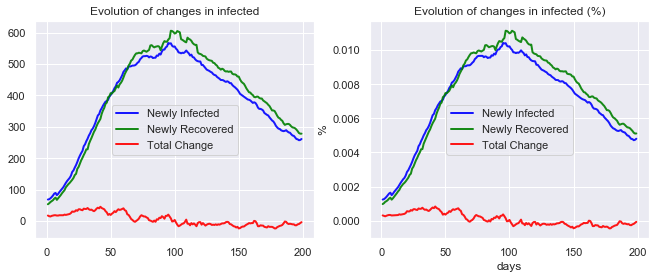

In [23]:
I_in = np.round(-x.N_popul_size*np.array(hp.mean_diff_list(data,'sus'))*scaling_factor)
I_out = np.round(x.N_popul_size*np.array(hp.mean_diff_list(data,'rec'))*scaling_factor)
dI = np.round(x.N_popul_size*np.array(hp.mean_diff_list(data,'inf'))*scaling_factor)
xval = np.arange(1,x.N_per)

plt.subplot(121)
plt.plot(xval,I_in,color='blue',linewidth=2,alpha=.9)
plt.plot(xval,I_out,color='green',linewidth=2,alpha=.9)
plt.plot(xval,dI,color='red',linewidth=2,alpha=.9)
plt.legend(['Newly Infected','Newly Recovered','Total Change'])
plt.title('Evolution of changes in infected')

plt.savefig(out_fig_dir+"/change.png",dpi=300)

I_in = -100*np.array(hp.mean_diff_list(data,'sus'))*scaling_factor
I_out = 100*np.array(hp.mean_diff_list(data,'rec'))*scaling_factor
dI = 100*np.array(hp.mean_diff_list(data,'inf'))*scaling_factor
xval = np.arange(1,x.N_per)
plt.subplot(122)
plt.plot(xval,I_in,color='blue',linewidth=2,alpha=.9)
plt.plot(xval,I_out,color='green',linewidth=2,alpha=.9)
plt.plot(xval,dI,color='red',linewidth=2,alpha=.9)
plt.legend(['Newly Infected','Newly Recovered','Total Change'])
plt.xlabel("days")
plt.ylabel("%")
plt.title('Evolution of changes in infected (%)')


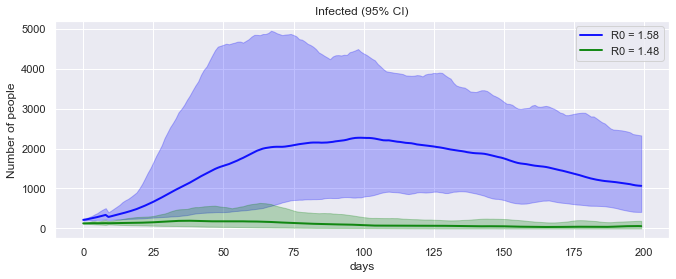

In [35]:
# Basic statistics
# 1. Peak of infected, 95% CI
idx=0
xval = np.arange(0,x.N_per)
leg = []
for idx in np.arange(N):
    data = data_array[idx]
    R0 = R0_array[idx]
    I_mean_abs = np.round(x.N_popul_size*np.array(hp.mean_list(data,'inf',ma=True,w=10))*scaling_factor)
    I_quant_95_abs = np.round(x.N_popul_size*np.array(hp.quant_list(data,'inf',val=0.95,ma=True,w=10))*scaling_factor)
    I_quant_05_abs = np.round(x.N_popul_size*np.array(hp.quant_list(data,'inf',val=0.05,ma=True,w=10))*scaling_factor)
    plt.plot(xval,I_mean_abs,color=col_array[idx],linewidth=2,alpha=.9)
    plt.fill_between(xval,I_quant_05_abs,I_quant_95_abs,color=col_array[idx],alpha=0.25)
    leg.append("R0 = "+ str(np.round(R0,2)))
plt.xlabel("days")
plt.ylabel("Number of people")
plt.title("Infected (95% CI)")
plt.legend(leg)
                 
plt.savefig("peaks.png",dpi=300)